Objective is to build a NLP Classification model based on target values spam and ham.

-This model includes 

-exploratory data analysis

-feature engineering

-feature selection

-visualisation

- model building based on different machine learning tools and find which model gives more accurate result

In [2]:
import numpy as np    #for matrix operations
import matplotlib.pyplot as plt   #visualisation
import pandas as pd       #input files
import seaborn as sns      #advanced visualisation library
from collections import Counter
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

c:\users\lalbabu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\lalbabu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
data = pd.read_csv("spam.csv", encoding = 'latin1')

In [6]:
data.head() #to see top 5 rows in dataframe 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.shape #to see total row and columnn in dataset

(5572, 5)

In [8]:
data.columns #lists all features/columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
data.v1.count()

5572

In [11]:
print(data.v1.unique())

['ham' 'spam']


In [16]:
print(data.v1.value_counts()) #count the total value of spam and ham in v1 column

ham     4825
spam     747
Name: v1, dtype: int64


In [25]:
# dropunavailable data
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1)

In [26]:
data.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [27]:
# renaming columns to improve readability
data = data.rename(columns={'v1':'target','v2':'text'}) 

In [29]:
print(data.columns)

Index(['target', 'text'], dtype='object')


In [30]:
data.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [34]:
data.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Distribution of spam and ham')

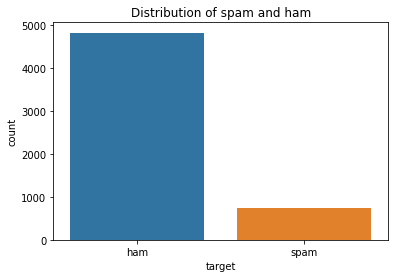

In [35]:
# plotting graph for distribution

sns.countplot(x = "target", data = data)
data.loc[:, 'target'].value_counts()
plt.title('Distribution of spam and ham')



c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


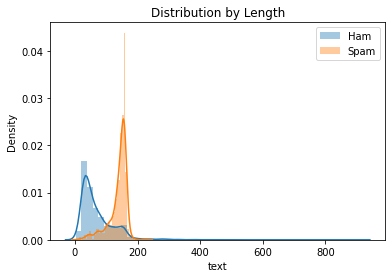

In [42]:
# plotting graph by length.

ham =data[data['target'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['target'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend();

c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


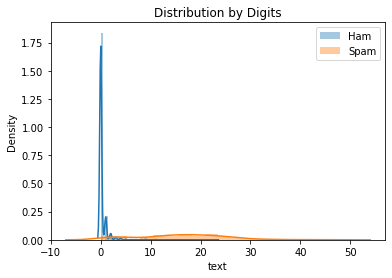

In [44]:
#plotting graph by digits.

ham1 = data[data['target'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = data[data['target'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend();

c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


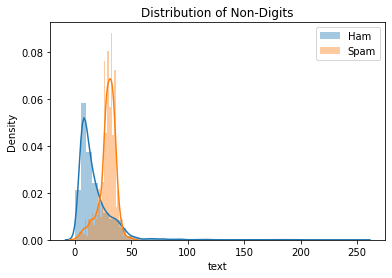

In [45]:
#plotting graph for non-digits.

ham2 = data[data['target'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = data[data['target'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()

In [46]:
#for counting frequently occurence of spam and ham.

count1 = Counter(" ".join(data[data['target']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['target']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

# Graph for top 30 words for ham

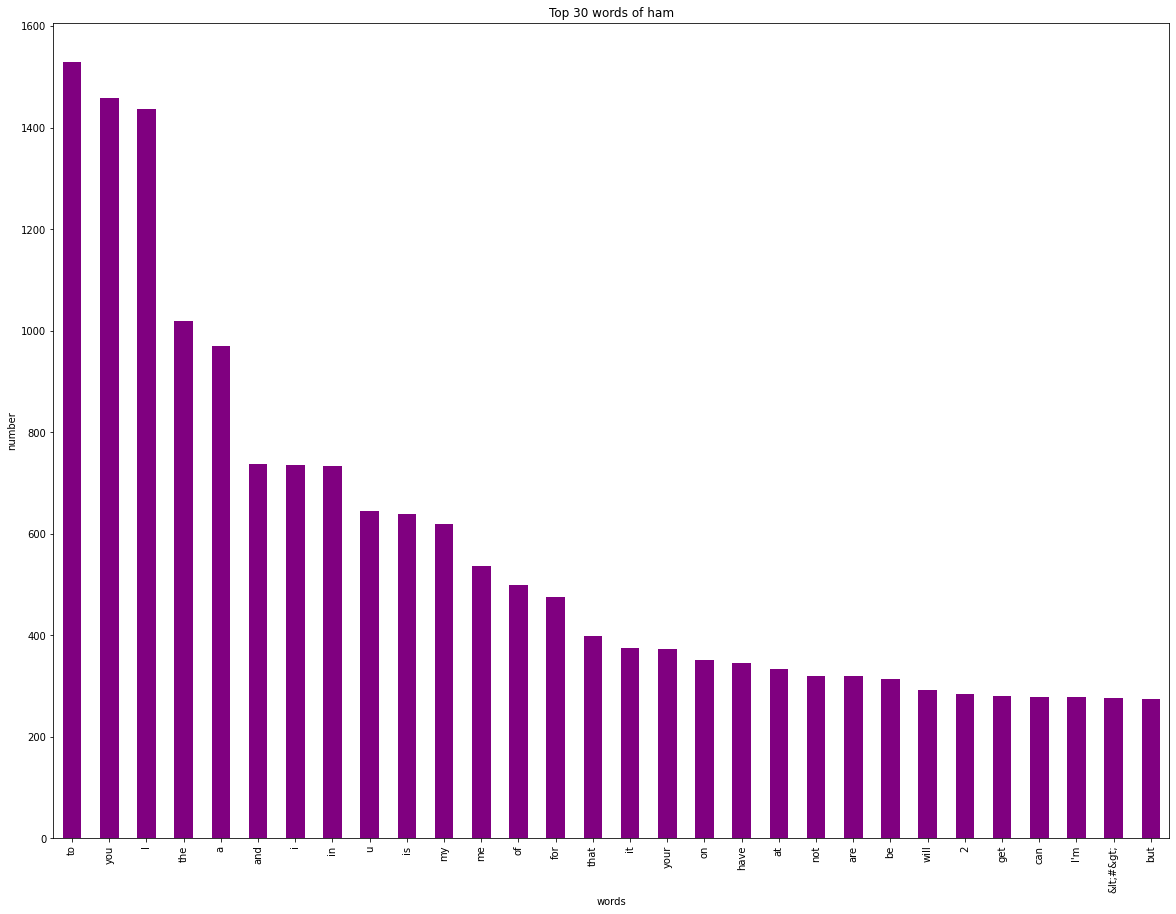

In [47]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# graph for top 30 words for spam

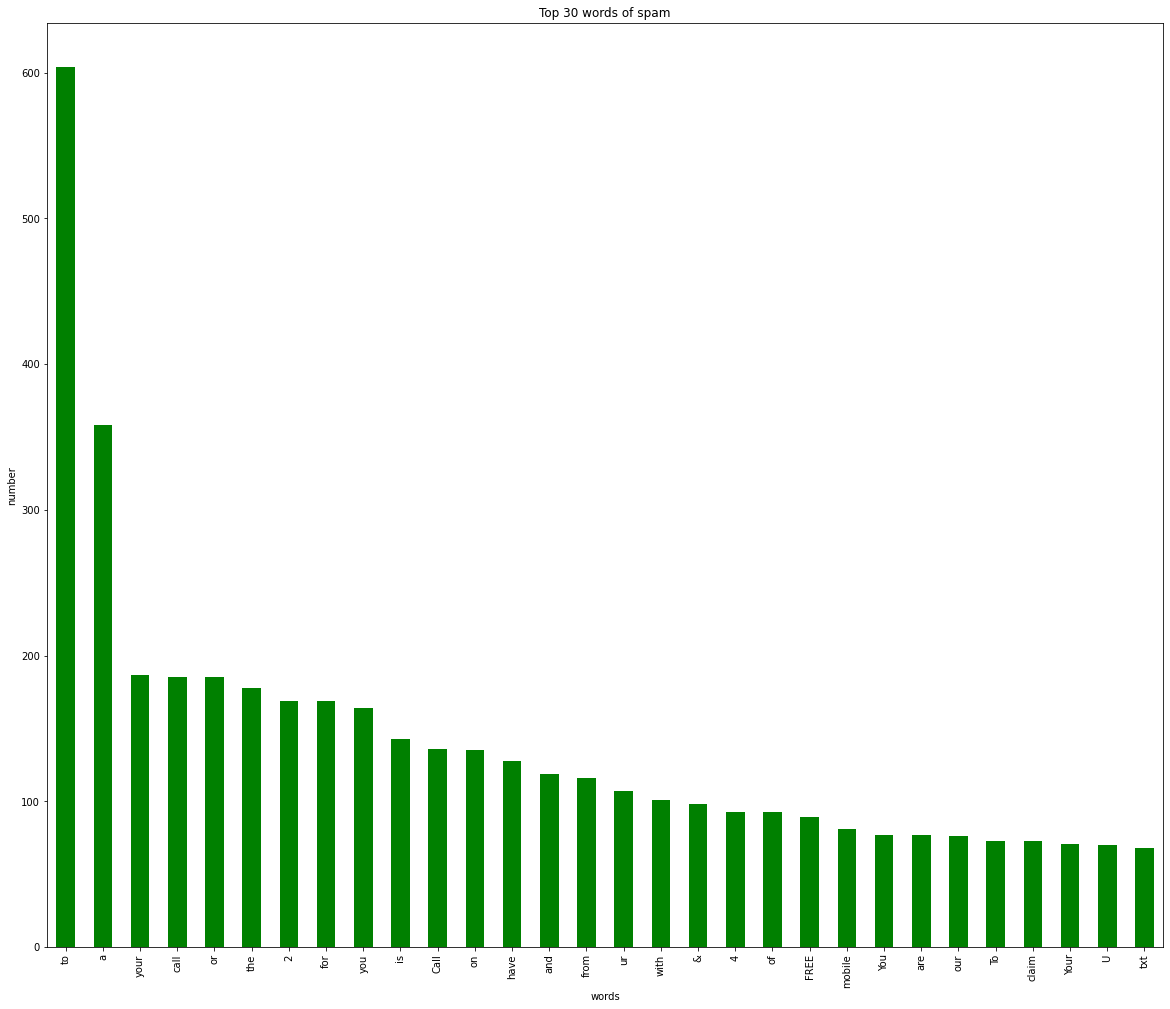

In [48]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# splitting the data into training and testing set

In [49]:
'''sklearn library is widely used in machine learning for splitting data in training and testing. It provides rich library
to build predictive model,large extent of performance matrix and hyperparameter tunning tools'''

'here, 70 percent data is being used for training purpose'


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672


In [52]:
'''Natural Language Toolkit¶. NLTK is a leading platform for building
Python programs to work with human language data'''

import nltk

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lalbabu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [55]:
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [56]:
'''Scikit-learn's CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.
It also enables the ​pre-processing of text data'''

cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [57]:
'''using transform method to convert train and test data in matrix'''

X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 42791 stored elements in Compressed Sparse Row format>

In [58]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1672x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 18658 stored elements in Compressed Sparse Row format>

# Naive bayes Classification

In [59]:
mnb = MultinomialNB(alpha= 0.5)
mnb.fit(X_train_cv, y_train)

y_mnb = mnb.predict(X_test_cv)

In [60]:
print('Naive Bayes Accuracy: ',  accuracy_score(y_mnb, y_test))

print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.9826555023923444
Naive Bayes confusion_matrix:  [[1425   15]
 [  14  218]]


# SVM Classification

In [61]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
svc.fit(X_train_cv, y_train)
y_svc = svc.predict(X_test_cv)

In [62]:
print('SVM accuracy: ', accuracy_score(y_svc, y_test))

print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM accuracy:  0.8343301435406698
SVM confusion_matrix:  [[1303  141]
 [ 136   92]]


# KNeighbors Classification

In [63]:
knc = KNeighborsClassifier(n_neighbors= 100)
knc.fit(X_train_cv, y_train)

y_knc = knc.predict(X_test_cv)

# Decision tree Classification

In [65]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)

dtc.fit(X_train_cv, y_train)

y_dtc = dtc.predict(X_test_cv)

In [66]:
print('Decision Tree Accuracy: ', accuracy_score(y_test,y_dtc))

print('Decision tree confusion_matrix: ', confusion_matrix(y_dtc,y_test))

Decision Tree Accuracy:  0.9706937799043063
Decision tree confusion_matrix:  [[1420   30]
 [  19  203]]


# Extra tree Classification

In [67]:
etc = ExtraTreesClassifier(n_estimators=37, random_state=252)

etc.fit(X_train_cv, y_train)
y_etc = etc.predict(X_test_cv)

In [68]:
print('Extra tree accuracy: ', accuracy_score(y_test,y_etc))

print('Extra Tree Confusion_matrix: ', confusion_matrix(y_etc, y_test))

Extra tree accuracy:  0.9772727272727273
Extra Tree Confusion_matrix:  [[1436   35]
 [   3  198]]


# Random Forest Classification 

In [69]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)

rfc.fit(X_train_cv, y_train)
y_rfc = rfc.predict(X_test_cv)

In [71]:
print('Random Forest Accuracy_score: ', accuracy_score(y_test,y_rfc))

print('Random forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))

Random Forest Accuracy_score:  0.9784688995215312
Random forest confusion_matrix:  [[1436   33]
 [   3  200]]


# Adaptive boosting classification

In [72]:
abc = AdaBoostClassifier(n_estimators=37, random_state= 252)

abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)

In [73]:
print('Adaboost Accuracy_score : ', accuracy_score(y_test,y_abc))

print('Adaboost Confusion matrix: ', confusion_matrix(y_abc, y_test))

Adaboost Accuracy_score :  0.965311004784689
Adaboost Confusion matrix:  [[1417   36]
 [  22  197]]


# Bagging Classification

In [74]:
bc = BaggingClassifier(n_estimators= 9, random_state= 252)
bc.fit(X_train_cv,y_train)
y_bc = bc.predict(X_test_cv)

In [75]:
print('Bagging accuracy_score: ', accuracy_score(y_test,y_bc))
print('Bagging Confusion_matrix: ', confusion_matrix(y_bc, y_test))

Bagging accuracy_score:  0.9742822966507177
Bagging Confusion_matrix:  [[1423   27]
 [  16  206]]


#By observing all classifications, Naive Bayes is giving more accurate result here